 # MOOCCUBEX Data Analysis

### The name of used data file is user-problem.json. In order to make it easy to analyse, this data file has been  processed into user-problem.csv

|Field    |description                      |   
|:----------|:----------                     |   
|log_id   |ID of the user's question record, combined with a unique key of user_id and problem_id |
|user_id |User ID, starting with U_|
|problem_id	|Problem ID, starting with Pm_|
|is_correct	|Is the question correct|
|attempts	|Number of attempted questions|
|score	|score|
|submit_time	|Question time|

In [1]:
import numpy as np
import pandas as pd
import re
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [2]:
path = "user-problem.csv"
data = pd.read_csv(path,encoding = "utf-8",low_memory=False,iterator=True)

In [3]:
loop=True
chunksize = 10000000
chunks =[]
while loop :
    try :
        chunk=data.get_chunk(chunksize)
        chunks.append(chunk)
    except StopIteration:
        loop=False
        print("Iteration is stopped")
df=pd.concat(chunks,ignore_index=True)

Iteration is stopped


In [4]:
df.head()

,log_id,problem_id,user_id,is_correct,attempts,score,submit_time
0,10000_6906522,Pm_6906522,U_10000,0,1,NaN,2020-10-27101156
1,10000_6906523,Pm_6906523,U_10000,0,1,NaN,2020-10-27101213
2,10000_6906524,Pm_6906524,U_10000,1,1,NaN,2020-10-27101228
3,10000_6906525,Pm_6906525,U_10000,0,1,NaN,2020-10-27101456
4,10000_6906526,Pm_6906526,U_10000,0,1,NaN,2020-10-27101518


## general feature 

In [5]:
df.describe()

,is_correct,attempts,score
count,1.333843e+08,1.333843e+08,6.254807e+07
mean,8.613328e-01,1.058706e+00,1.159764e+00
std,3.455989e-01,4.070407e-01,1.596116e+00
min,0.000000e+00,1.000000e+00,-1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00
max,1.000000e+00,4.580000e+02,1.000000e+02


In [6]:
print("the number of records:")
print(df['log_id'].count())

the number of records:
133384333


In [7]:
print('Part of missing values for every column')
print(df.isnull().sum() / len(df))

Part of missing values for every column
log_id         0.000000
problem_id     0.000000
user_id        0.000000
is_correct     0.000000
attempts       0.000000
score          0.531069
submit_time    0.000000
dtype: float64


In [8]:
print("the number of users")
len(df.user_id.unique())

the number of users


1290530

In [9]:
print("the number of  problems")
len(df.problem_id.unique())

the number of  problems


1371695

## sort by user_id

In [10]:
ds = df['user_id'].value_counts().reset_index() 

In [11]:
ds.columns = [
    'user_id',
    'count'
]

In [12]:
ds['user_id'] = ds['user_id'].astype(str) + '-' #将数据转成str类。否则纵坐标出错

In [13]:
ds = ds.sort_values(['count']).tail(50)

In [14]:
fig = px.bar(
    ds,
    x = 'count',
    y = 'user_id',
    orientation='h',
    title='Top 50 users by the number of solving problem'
)

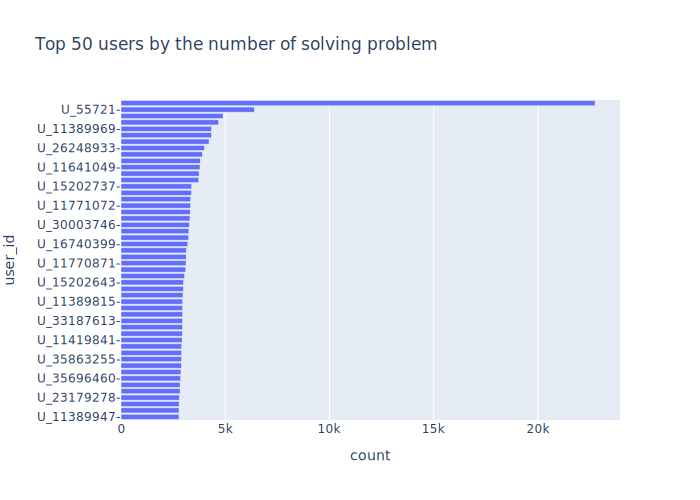

In [15]:
fig.show("svg")

In [16]:
ds = df['user_id'].value_counts().reset_index() 

In [17]:
ds.columns = [
    'user_id',
    'count'
]

In [18]:
ds= ds.astype(str)
ds = ds.applymap(lambda x: re.sub(r'U_','', x))
ds = ds.astype(int)
ds = ds.sort_values('user_id')

In [19]:
fig = px.histogram(
    ds,
    x = 'user_id',
    y = 'count',
    title = 'User solving problem distribution'
)

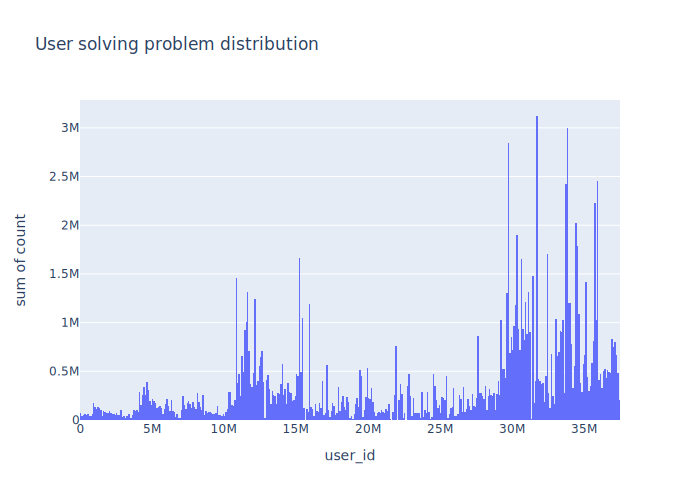

In [20]:
fig.show("svg")

## Sort by correct answer

In [21]:
ds = df['is_correct'].value_counts().reset_index()

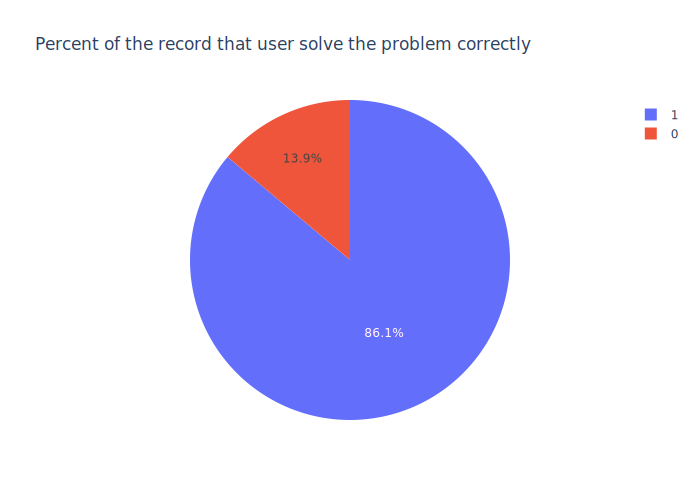

In [22]:
ds.columns = [
    'is_correct',
    'percent'
]
ds['percent'] /= len(df)
ds = ds.sort_values(['percent'])
fig = px.pie(
    ds,
    names = ['0', '1'],
    values = 'percent',
    title = 'Percent of the record that user solve the problem correctly '    
)

fig.show("svg")

## Sorted by submit_time

In [23]:
ds=df['submit_time']

In [24]:
ds=pd.DataFrame(ds)

In [25]:
ds = ds.applymap(lambda x: re.sub(r'-[0-9]{8}','', x))

In [26]:
ds = ds.sort_values(['submit_time'])

In [27]:
ds = ds['submit_time'].value_counts().reset_index()

In [28]:
ds.columns=[
    'submit_time',
    'count'
]

In [29]:
fig = px.bar(
    ds,
    x = 'submit_time',
    y = 'count',
    title = 'User solving problem date distribution'
)

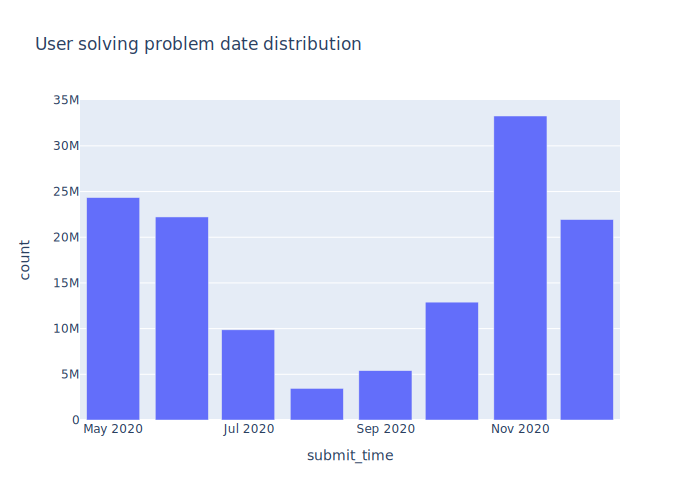

In [30]:
fig.show("svg")

## Sorted by attempts

In [31]:
grouped=df.groupby(by=['problem_id'],as_index=False)

In [32]:
series=grouped['attempts'].mean()

In [33]:
series = series.sort_values(['attempts']).tail(50)

In [34]:
fig = px.bar(
    series,
    x = 'attempts',
    y = 'problem_id',
    orientation='h',
    title='Top 50 problems with the highest average number of attempts'
)

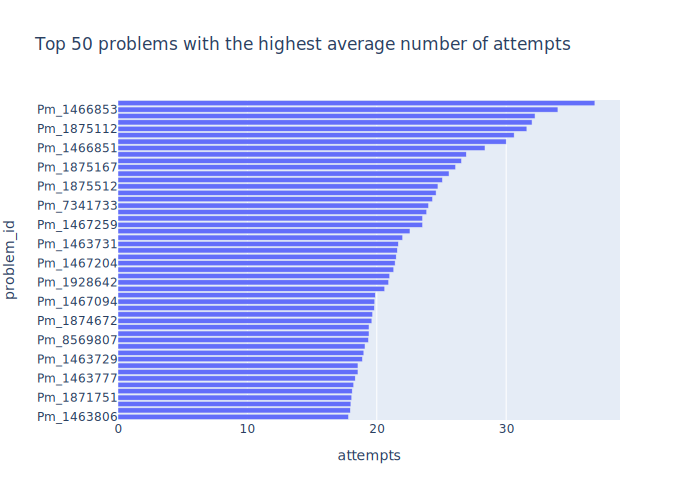

In [35]:
fig.show("svg")

## sorted by problem_id

In [55]:
ds = df['problem_id'].value_counts().reset_index()

In [56]:
ds.columns = [
    'problem_id', 
    'count'
]

In [57]:
ds = ds.sort_values('problem_id')

In [58]:
ds= ds.astype(str)
ds = ds.applymap(lambda x: re.sub(r'Pm_','', x))
ds = ds.astype(int)

In [59]:
fig = px.histogram(
    ds, 
    x='problem_id', 
    y='count', 
    title="records'distribution on problem_id"
)

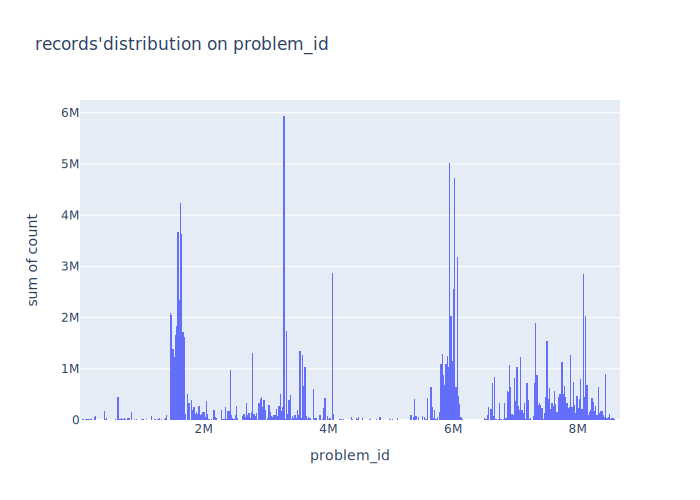

In [60]:
fig.show("svg")

## sorted by score

In [42]:
grouped=df.groupby(by=['user_id'],as_index=False)

In [43]:
series=grouped['score'].mean()

In [44]:
ds=series['score'].value_counts().reset_index()

In [45]:
ds.columns=[
    'avg_score',
    'count'
]

In [46]:
ds=ds.sort_values(['avg_score'])

In [47]:
fig = px.histogram(
    ds, 
    x='avg_score', 
    y='count', 
    title='average score distribution'
)

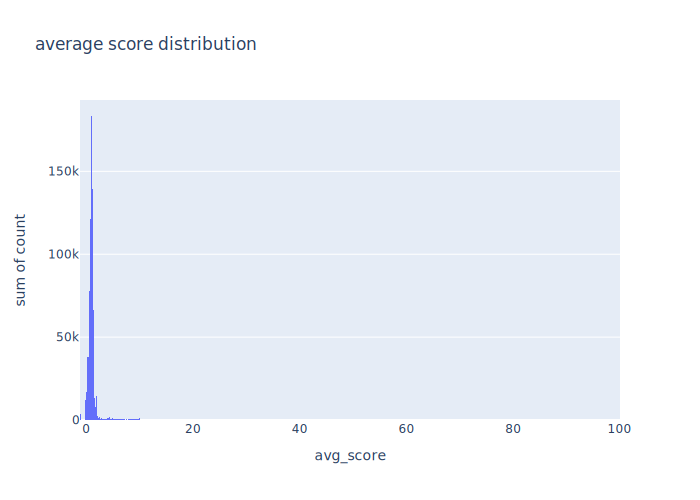

In [48]:
fig.show("svg")

In [49]:
grouped=df.groupby(by=['problem_id'],as_index=False)

In [50]:
series=grouped['score'].mean()
series=series.dropna(axis=0,how='any')

In [51]:
series.columns=[
    'problem_id',
    'avg_score'
]

In [52]:
series=series.sort_values(['avg_score']).tail(50)

In [53]:
fig = px.bar(
    series,
    x = 'avg_score',
    y = 'problem_id',
    orientation='h',
    title='Top 50 problems that have a high score'
)

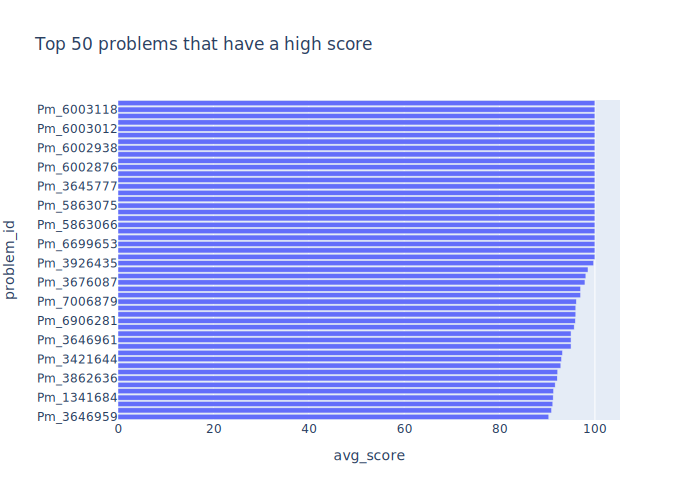

In [54]:
fig.show("svg")